In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gco import pygco
import cv2

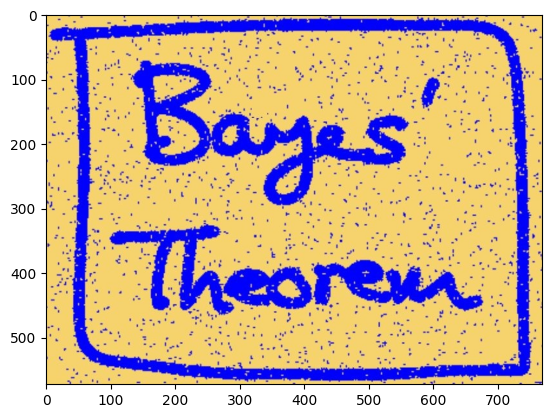

In [7]:
def dist(c1, c2):
    return (abs(c1[0] - c2[0]) + abs(c1[1] - c2[1]) + abs(c1[2] - c2[2])) / 3


srcImg = cv2.imread('data/bayes_in.jpg')
plt.imshow(cv2.cvtColor(srcImg, cv2.COLOR_BGR2RGB))

In [8]:
denoiseImg = srcImg
srcImg = cv2.cvtColor(srcImg, cv2.COLOR_BGR2RGB)
denoiseImg = cv2.cvtColor(denoiseImg, cv2.COLOR_BGR2RGB)

H = srcImg.shape[0]  #height of img
W = srcImg.shape[1]  #width of img

src_color = np.array([0, 0, 255])  # blue = foreground
sink_color = np.array([245, 210, 110])  #yellow = background

unary = np.zeros([H, W, 2])
pairwise = (1 - np.eye(2))

for y in range(0, H):
    for x in range(0, W):
        c = srcImg[y][x]
        src_label = dist(c, src_color) / 255
        sink_label = dist(c, sink_color) / 255
        unary[y][x] = [src_label, sink_label]

In [9]:
def process_image(lambda_):
    labels = pygco.cut_grid_graph_simple(unary, pairwise * m_lambda, n_iter=-1)
    labels = labels.reshape(H, W)

    for y in range(0, H):
        for x in range(0, W):
            if labels[y][x] == 1:
                denoiseImg[y][x] = sink_color
            if labels[y][x] == 0:
                denoiseImg[y][x] = src_color
    plt.figure(figsize=(5, 5))
    plt.title(f'm_lambda = {lambda_}')
    plt.imshow(denoiseImg)
    plt.show()

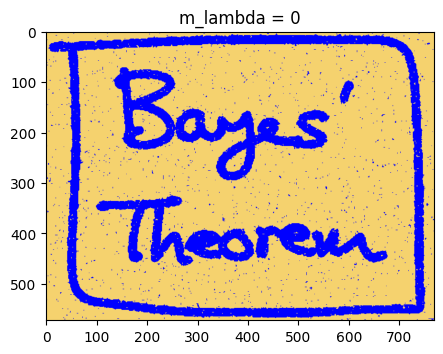

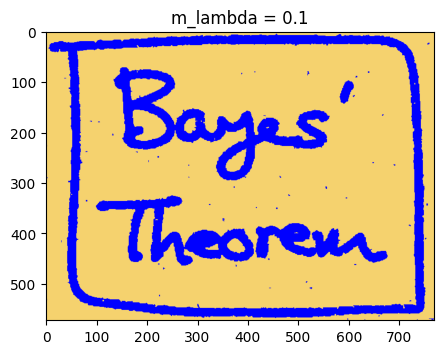

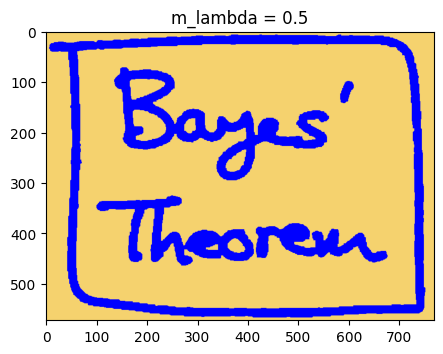

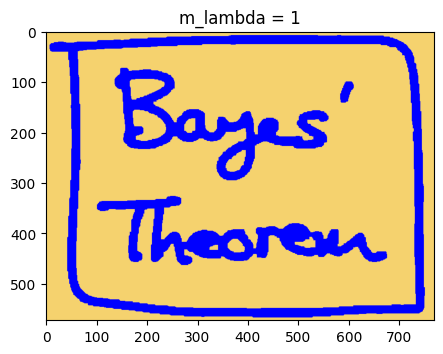

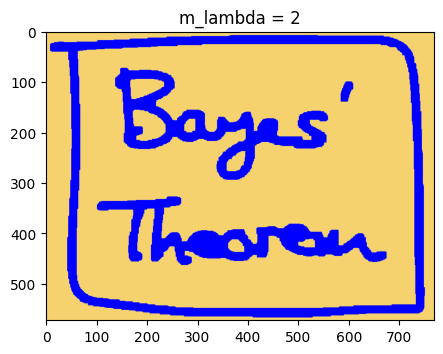

In [10]:
lambda_data = [0, 0.1, 0.5, 1, 2]
for m_lambda in lambda_data:
    process_image(m_lambda)

# The larger the Lambda, the better the noise removal performance. 
# It can be seen when lambda equal to 1, it will show the best result. When lambda is very small, just like the value of 0.1, some noise cannot be eliminated. When the λ increases, the image can be well denoised and the edges can be softened. When the lambda is too large, if the value is 5, some information will be deleted by mistake.